# Cross Validation

In [1]:
import pandas as pd
import numpy as np
# set seed
seed = 12
np.random.seed(12)
np.warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from proj1_helpers import *
from implementations import *
from helpers import *

%load_ext autoreload
%autoreload 2

In [2]:
# data path
train_data_path = "../data/train.csv"
test_data_path = "../data/test.csv"

# load training and test set
y_train_raw, x_train_raw, id_train = load_csv_data(train_data_path)
y_test_raw, x_test_raw, id_test = load_csv_data(test_data_path)

In [3]:
y_train = np.copy(y_train_raw)
x_train = np.copy(x_train_raw)
x_test = np.copy(x_test_raw)
y_test = np.copy(y_test_raw)

In [4]:
# get jet index of three groups
jet_index_train = get_jet_index(x_train)
jet_index_test = get_jet_index(x_test)

In [5]:
def accuracy(y_true, y_pred):
    return np.sum(y_pred==y_true) / len(y_true)

def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
    
    x_tr, x_te = preprocessing(x_tr, x_te)    
    y_pd_tr, y_pd_te = train_predict(x_tr, y_tr, x_te, y_te, degree, lambda_)
    
    return accuracy(y_tr, y_pd_tr), accuracy(y_te, y_pd_te)

In [6]:
def tune_degree(degrees, lambda_, x, y, k_fold=5, seed=seed):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the accuracy of training data and validation data
    acc_tr_list = []
    acc_te_list = []
    # cross validation
    for degree in degrees:
        acc_tr_tmp = []
        acc_te_tmp = []
        for k in range(k_fold):
            acc_tr, acc_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            acc_tr_tmp.append(acc_tr)
            acc_te_tmp.append(acc_te)
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_te_tmp))

        acc_tr_list.append(np.mean(acc_tr_tmp))
        acc_te_list.append(np.mean(acc_te_tmp))
    return acc_tr_list, acc_te_list

def tune_lambda(lambdas, degree, x, y, k_fold=5, seed=seed):
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the accuracy of training data and validation data
    acc_tr_list = []
    acc_te_list = []
    # cross validation
    for lambda_ in lambdas:
        acc_tr_tmp = []
        acc_te_tmp = []
        for k in range(k_fold):
            acc_tr, acc_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            acc_tr_tmp.append(acc_tr)
            acc_te_tmp.append(acc_te)
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_te_tmp))

        acc_tr_list.append(np.mean(acc_tr_tmp))
        acc_te_list.append(np.mean(acc_te_tmp))
    return acc_tr_list, acc_te_list

In [7]:
def plot_degree(degrees, acc_tr_list, acc_te_list):
    plt.plot(degrees, acc_tr_list, label='training')
    plt.plot(degrees, acc_te_list, label='validating')
    plt.grid()
    plt.legend()
    plt.xticks(degrees)
    plt.xlabel("Degrees")
    plt.ylabel("Accuracy")
    plt.show()

def plot_lambdas(lambdas, acc_tr_list, acc_te_list):
    plt.semilogx(lambdas, acc_tr_list, label='training')
    plt.semilogx(lambdas, acc_te_list, label='validating')
    plt.grid()
    plt.legend()
    plt.xlabel("Lambdas")
    plt.ylabel("Accuracy")
    plt.show()

## Group 0: degree=15, lambda_= $10^{-6}$

In [8]:
i = 0
y_train_i = y_train[jet_index_train[i]]
x_train_i = x_train[jet_index_train[i]]

###  Tune degree

In [9]:
degrees = range(10, 21)
acc_tr_list, acc_te_list = tune_degree(degrees=degrees, lambda_=1e-3, x=x_train_i, y=y_train_i)

10 0.8462266039435493 0.8453007706936244
11 0.8471199079171254 0.8459613652287057
12 0.8470848763887497 0.8459913922530278
13 0.8476128515664098 0.8464618156340705
14 0.8475778200380344 0.8466920228205386
15 0.847865579021119 0.8466820138124312
16 0.8479256330697627 0.8467020318286458
17 0.8478755880292264 0.8466219597637874
18 0.8476528875988389 0.8464117705935342
19 0.8410169152237014 0.8398658792913622
20 0.8248648783905516 0.8246722049844861


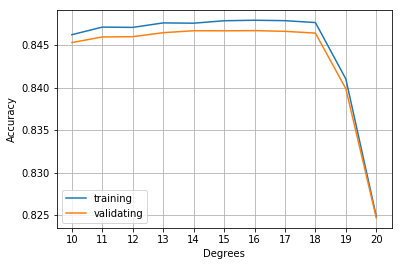

In [10]:
plot_degree(degrees, acc_tr_list, acc_te_list)

In [11]:
lambdas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
acc_tr_list, acc_te_list = tune_lambda(lambdas=lambdas, degree=15, x=x_train_i, y=y_train_i)

1e-08 0.8467195475928335 0.845360824742268
1e-07 0.8141327194475027 0.8125613051746573
1e-06 0.849131718546692 0.8480332299069163
1e-05 0.8484285857271544 0.847222500250225
0.0001 0.8485036532879591 0.8470723651286157
0.001 0.847865579021119 0.8466820138124312
0.01 0.8458612751476329 0.8452807526774097


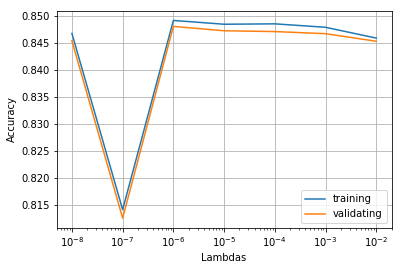

In [12]:
plot_lambdas(lambdas, acc_tr_list, acc_te_list)

## Group 1: degree=19, lambda_=$10^{-4}$

In [13]:
i = 1
y_train_i = y_train[jet_index_train[i]]
x_train_i = x_train[jet_index_train[i]]

### Tune degrees

In [14]:
degrees = range(10, 21)
acc_tr_list, acc_te_list = tune_degree(degrees=degrees, lambda_=1e-3, x=x_train_i, y=y_train_i)

10 0.8118422749548619 0.8098400825380448
11 0.8134898117100852 0.811310291462471
12 0.8141862264637606 0.8115037400051586
13 0.8148117100851173 0.811942223368584
14 0.8149438999226206 0.8128320866649471
15 0.8153598142893991 0.8129352592210471
16 0.8152695383028113 0.8129094660820222
17 0.8153662625741553 0.8126515346917721
18 0.8119905855042558 0.8090920815063193
19 0.8156080732525147 0.813283466597885
20 0.8152856590147021 0.8124967758576218


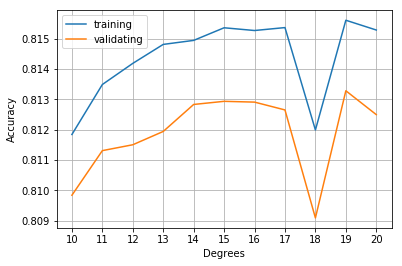

In [15]:
plot_degree(degrees, acc_tr_list, acc_te_list)

### Tune lambda

In [16]:
lambdas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
acc_tr_list, acc_te_list = tune_lambda(lambdas=lambdas, degree=19, x=x_train_i, y=y_train_i)

1e-08 0.8154468661336084 0.8122646376063967
1e-07 0.8160562290430746 0.8123936033015218
1e-06 0.8161336084601496 0.8129223626515347
1e-05 0.8161110394635026 0.81325767345886
0.0001 0.8159756254836212 0.813438225432035
0.001 0.8156080732525147 0.813283466597885
0.01 0.8123452411658498 0.8084601496002064


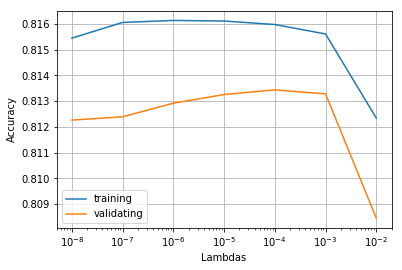

In [17]:
plot_lambdas(lambdas, acc_tr_list, acc_te_list)

 ## Group 2: degree=17, lambda_=$10^{-4}$

In [18]:
i = 2
y_train_i = y_train[jet_index_train[i]]
x_train_i = x_train[jet_index_train[i]]

### Tune degrees

In [19]:
degrees = range(10, 21)
acc_tr_list, acc_te_list = tune_degree(degrees=degrees, lambda_=1e-3, x=x_train_i, y=y_train_i)

10 0.8464915908464296 0.8418665563826855
11 0.8474186655638268 0.843038323683485
12 0.8483078301626688 0.8441687344913152
13 0.8487007168458781 0.8444858009374139
14 0.8490591397849462 0.8445547284256962
15 0.8493968844775296 0.8448993658671078
16 0.8489178384339675 0.844582299421009
17 0.8496967190515579 0.8451475048249242
18 0.8495726495726496 0.8445960849186654
19 0.8492900468706921 0.8451475048249242
20 0.8483354011579817 0.8438930245381858


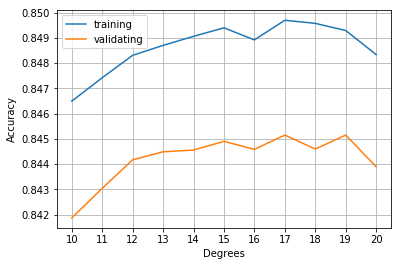

In [20]:
plot_degree(degrees, acc_tr_list, acc_te_list)

### Tune lambda

In [21]:
lambdas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
acc_tr_list, acc_te_list = tune_lambda(lambdas=lambdas, degree=17, x=x_train_i, y=y_train_i)

1e-08 0.8491452991452991 0.8431899641577061
1e-07 0.8500827129859388 0.8440860215053764
1e-06 0.8501998897160187 0.8446512269092914
1e-05 0.8502481389578165 0.8445409429280396
0.0001 0.8501516404742212 0.8451888613178935
0.001 0.8496967190515579 0.8451475048249242
0.01 0.8476943755169563 0.8427901847256687


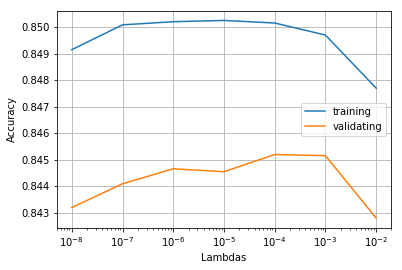

In [22]:
plot_lambdas(lambdas, acc_tr_list, acc_te_list)

# Predict

In [26]:
lambdas = [1e-6, 1e-4, 1e-4]
degrees = [15, 19, 17]
y_pred_train = np.zeros_like(y_train)
y_pred_test = np.zeros_like(y_test)
for i in range(3):
    lambda_ = lambdas[i]
    degree = degrees[i]
    train_index = jet_index_train[i]
    test_index = jet_index_test[i]
    x_tr = x_train[train_index]
    y_tr = y_train[train_index]
    x_te = x_test[test_index]
    y_te = y_test[test_index]
    
    x_tr, x_te = preprocessing(x_tr, x_te)
    y_pred_train[train_index], y_pred_test[test_index] = train_predict(x_tr, y_tr, x_te, y_te, degree, lambda_)

In [27]:
accuracy(y_train, y_pred_train)

0.83878

In [28]:
#create_csv_submission(id_test, y_pred_test, "OCT29")